In [15]:
import pandas as pd

In [16]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# metadata 
print(aids_clinical_trials_group_study_175.metadata) 
  
# variable information 
print(aids_clinical_trials_group_study_175.variables)


{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

In [17]:
X.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,1,3,0,0,0,504,353,870,782


In [18]:
y.head()

,cid
0,0
1,1
2,0
3,0
4,0


In [19]:
# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Save to CSV
df.to_csv("aids_clinical_trials.csv", index=False)

print("Dataset saved as 'aids_clinical_trials.csv’")

Dataset saved as 'aids_clinical_trials.csv’


## Documentation

* Purpose: "To examine the performance of two different types of AIDS treatments" (4 arms)

* Data preparation

- Create percentage of survival (think y-axis for Kaplan-Meier), means finding the number of rows for each arm ('trt')

* Things to ask and answer

- Unsupervised (Clustering)

    - What clusters of patients exist?

- Supervised (Logistic regression, Decision Tree, Random Forest, Extreme Random Trees, SVM)

    - How well do all the features predict mortality (cid)?

    - Did the treatment success vary by demographics, age, sex, race, gender, sexual orientation, history of IV drug use

    - Other characteristics include, weight, hemophilia

    - Which variable(s) are most predictive of survival or morbidity

    - Time to failure?

* Statistical Approaches or Figures

- Kaplan-Meier

- Cox proportional hazards ratio

* Optimization

- Check for any imbalanced data

In [20]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [21]:
df_cluster = df.drop(columns=['cid']).copy()

df_cluster.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,0,1,0,1,0,422,477,566,324
1,1002,3,61,49.4424,0,0,0,90,0,1,...,0,1,3,0,1,0,162,218,392,564
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,1,3,0,1,1,326,274,2063,1893
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,1,3,0,1,0,287,394,1590,966
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,1,3,0,0,0,504,353,870,782


In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)

model.fit(df_cluster)

preds = model.predict(df_cluster)

preds

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [23]:
df_new = df_cluster.copy()

df_new['target'] = preds

df_new.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,target
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,1
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,1


<Axes: xlabel='time', ylabel='age'>

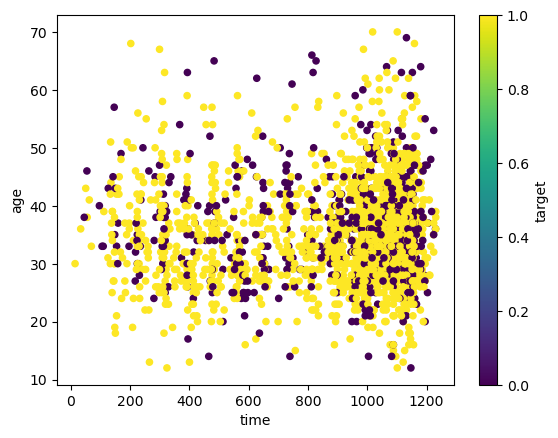

In [24]:
df_new.plot.scatter(
    x='time',
    y='age',
    c='target',
    colormap='viridis'
)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [26]:
from sklearn.preprocessing import StandardScaler

# Create a df copy
df_copy = df.copy()

# Columns to scale
cols_to_scale = ['age', 'wtkg', 'karnof', 'cd40', 'cd420', 'cd80', 'cd820']

# Create the StandardScaler instance
scaler = StandardScaler()

# Scale the selected columns
df_copy[cols_to_scale] = scaler.fit_transform(df_copy[cols_to_scale])

df_copy.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,1.464542,1.107649,0,0,0,0.771836,0,0,...,0,1,0,1,0,0.603131,0.730927,-0.876151,-1.374260,0
1,1002,3,2.957595,-1.936862,0,0,0,-0.923192,0,1,...,1,3,0,1,0,-1.590108,-1.060207,-1.238586,-0.834779,1
2,961,3,1.119991,1.005025,0,1,1,-0.923192,0,1,...,1,3,0,1,1,-0.206680,-0.672935,2.242044,2.152597,0
3,1166,3,1.349692,0.765569,0,1,0,0.771836,0,1,...,1,3,0,1,0,-0.535666,0.156934,1.256802,0.068852,0
4,1090,0,0.890291,-0.636959,0,1,0,0.771836,0,1,...,1,3,0,0,0,1.294845,-0.126605,-0.242930,-0.344750,0


In [27]:
# Fit the StandardScaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)